In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go

from IPython.display import IFrame


# Load Data

In [2]:
df = pd.read_csv('prices.csv')
df['date'] = pd.to_datetime(df['date'])

# add year column and montn column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df.head()

,date,symbol,open,close,low,high,volume,year,month
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,2016,1
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,2016,1
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,2016,1
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,2016,1
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,2016,1


Key column: date     
Value column: symbol, open, close, low, high, volumn    
According to VTFP 2.6, a key attribute acts as an index that is used to look up value attributes. Symbol is a categorical variable but one value could corresponding to mutiple records. Open, cloase, low, high, volumn are quantitative variables that may have duplicate values. Thus, only date satisfies the definition of key.

# Task
Targets are aspects of the data interest that are interest to the user. Actions define user goals.
A low-level task of corelate - finding the trend of stock (price change, volume change) over time.

# Visualization 1

Text(0, 0.5, 'Open Stock Price')

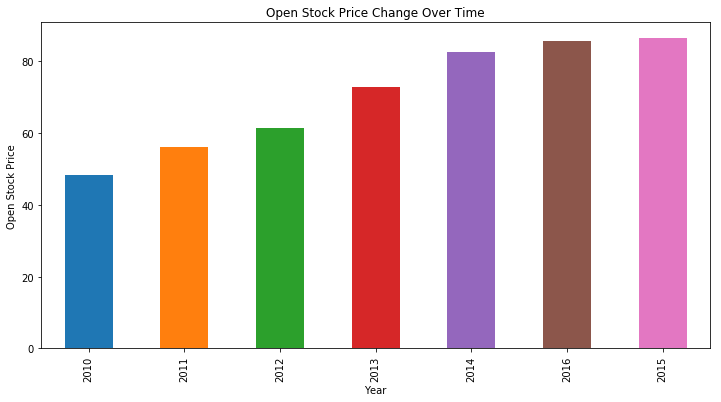

In [3]:
plt.figure(figsize=(12,6))

# group by year and calculate mean of open price
df.groupby(pd.Grouper(key='year')).mean()['open'].sort_values(ascending=True).plot.bar()

# show labels 
plt.title('Open Stock Price Change Over Time')
plt.xlabel('Year')
plt.ylabel('Open Stock Price')

The average open stock price has a increasing trend by year.     
The most important attributes should be encoded with the most effective channels in order to be most noticeable and the most effective is aligned spatial position (VAD page 101) so I sort the mean of hours-per-week from high to low. 
The key attribute, year, separates the marks along the horizontal spatial axis. The value attribute, average open stocj price, expresses the value with aligned vertical spatial position and line marks (VAD page 150).  
Before plotting the interactive visualization, the bar plot can present us a overall image of the price trend over the year. If we do see a trend, we can do further analysis. For instance, we can break year into season or month to get a more detailed trend. 


# Visualization 2

Text(0.5, 1.0, 'Volume Proportion By Year')

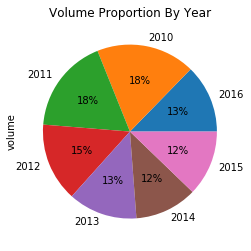

In [4]:
# group by year and calculate sum of volume 
df.groupby(pd.Grouper(key='year')).sum()['volume'].plot.pie(autopct='%1.0f%%')

# show x labels 
plt.title('Volume Proportion By Year')


# Interactive Visualization 1

In [15]:
# mean of open price by month
df1 = df.groupby(pd.Grouper(key='date',freq='1M')).mean()['open'].reset_index(name = "AVG_OPEN")
df1 = pd.DataFrame(df1)


# mean of close price by month
df2 = df.groupby(pd.Grouper(key='date',freq='1M')).mean()['close'].reset_index(name = "AVG_CLOSE")
df2 = pd.DataFrame(df2)

# mean of high price by month
df3 = df.groupby(pd.Grouper(key='date',freq='1M')).mean()['high'].reset_index(name = "AVG_HIGH")
df3 = pd.DataFrame(df3)

# mean of low price by month
df4 = df.groupby(pd.Grouper(key='date',freq='1M')).mean()['low'].reset_index(name = "AVG_LOW")
df4 = pd.DataFrame(df4)

#Create a trace
trace = go.Scatter(
    x = df1['date'],
    y = df1['AVG_OPEN']
)

data = [trace]

py.iplot(data, filename='basic-line')


# Create traces
trace0 = go.Scatter(
    x = df1['date'],
    y = df1['AVG_OPEN'],
    line = dict(
        color = ('rgb(255,255,0)'),
        width = 1),
    name = 'open'
)
trace1 = go.Scatter(
    x = df2['date'],
    y = df2['AVG_CLOSE'],
    line = dict(
        color = ('rgb(0,128,0)'),
        width = 1),
    name = 'close'
)
trace2 = go.Scatter(
    x = df3['date'],
    y = df3['AVG_HIGH'],
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 1,
        dash = 'dot'),
    name = 'high'
)

trace3 = go.Scatter(
    x = df4['date'],
    y = df4['AVG_LOW'],
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 1,
        dash = 'dot'),
    name = 'low'
)

data = [trace0, trace1, trace2, trace3]

layout = go.Layout(
    title='Stock Price Change 2010-2016',
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='line-mode')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~admail1121/0 or inside your plot.ly account where it is named 'basic-line'


  The identity channel of hue is extremely effective for categorical data and showing groupings. It is the highest ranked channel for categorical data after spatial position (VAD page 224). I chose blue, red, yellow and green, colors from hue, to seperate the classes. Line charts is good for ordered keys but not categorical keys. In our case, it's time.  
  The plot shows the price (open, close, high, low) change by month from 2010 to 2016. Overall, the stock price is increasing as time goes by except for two big drop in late 2011 and early 2016.   
  The idiom of line charts augments dot charts with line connection marks running between the points. The visualization shows a line chart plotting the stock price over several years. The trend of constantly increasing price, followed
by loss in the early 2016, is emphasized by the connecting lines (VAD page 155).

# Interactive Visualization 2

In [43]:
# group by year and calculate sum of volume 
df_v = df.groupby(pd.Grouper(key='year')).sum()['volume'].reset_index(name = "SUM_VOL")


labels = df_v['year']
values = df_v['SUM_VOL']

trace = go.Pie(labels=labels, values=values,hoverinfo='label+value+percent', textinfo='percent',
              textfont=dict(size=20))

data = [trace]
layout = go.Layout(title='Stock Volumn Change By Year 2010-2016')
fig = go.Figure(data=data, layout=layout)


py.iplot(fig, filename='basic_pie_chart')


Pie chart is the most commonly used radial statistical graphic. It encodes single attribute with area marks
and the angle channel. The most useful property of pie charts is that they show the relative contribution of parts to a whole. The single pie chart showing aggregate stock data to a normalized stacked bar chart and a stacked bar chart for stock volume from 2010 to 2016 (VAD page 170).     
The plot shows that 2010 occupies the most volume among the years.     
I chose bar plot because it is good at solving part–whole relationship task. It's a relatviely intuitive way to observe the relation between the year and volume before making the interactive plot. We can tell that unlike to the open price, the volumn decreases as time pass by.